In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('../data/data.csv.csv',encoding='utf-8')
print(df.sample(15))

       InvoiceNo StockCode                          Description  Quantity  \
424907    573289     23459             DOLLY CABINET 2 DRAWERS          2   
404434    571676     21747                 SMALL SKULL WINDMILL         2   
493256    578211     20771               CHRYSANTHEMUM  JOURNAL         1   
401689    571441     23301    GARDENERS KNEELING PAD KEEP CALM         10   
307069    563903     22662          LUNCH BAG DOLLY GIRL DESIGN         5   
66368    C541790     82580                  BATHROOM METAL SIGN       -12   
194156    553552     21403                      BLUE EGG  SPOON        24   
421462    572986     22024           RAINY LADIES BIRTHDAY CARD        12   
528480    580729     23093  SMALL PARISIENNE HEART PHOTO FRAME          1   
61510     541424     21903                   MAN FLU METAL SIGN         1   
344402    567062     23376  PACK OF 12 VINTAGE CHRISTMAS TISSUE        24   
163131    550541     22087             PAPER BUNTING WHITE LACE         5   

In [5]:
# 查看信息
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [6]:
# 删除重复值
df.drop_duplicates(inplace=True)
df.shape[0]  # 536641

536641

In [7]:
NaN_num = df.isnull().sum()
NaN_percent = (df.isnull().sum()/df.shape[0]).apply(lambda x:str(round(x*100,2))+'%') 
nan_df = pd.DataFrame(
    {
        'nan_num':NaN_num,
        'nan_persent':NaN_percent
    }
).sort_values(by='nan_num',ascending=False)

print(nan_df)

             nan_num nan_persent
CustomerID    135037      25.16%
Description     1454       0.27%
InvoiceNo          0        0.0%
StockCode          0        0.0%
Quantity           0        0.0%
InvoiceDate        0        0.0%
UnitPrice          0        0.0%
Country            0        0.0%


In [8]:
# 查看用户编号为缺失值的数据，找到其InvoiceNo订单编号
CustomerID_isnull_list = df.loc[df['CustomerID'].isnull()].InvoiceNo.unique().tolist()
# 查看用户编号为非缺失值的列，找到其InvoiceNo订单编号
CustomerID_notnull_list = df.loc[~df['CustomerID'].isnull()].InvoiceNo.unique().tolist()
# 查看两者交集--即缺失值中没有订单编号与未缺失的相同

[i for i in CustomerID_isnull_list if i in CustomerID_notnull_list]

[]

In [9]:
# 去除缺失值
df.dropna(subset = ['CustomerID'],inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB
None


In [10]:
# 类型转换
df['CustomerID'] = df['CustomerID'].astype('int').astype('str')
df.InvoiceDate = pd.to_datetime(df.InvoiceDate).dt.strftime('%Y-%m-%d')
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object


In [11]:
df.sample(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
169835,551268,M,Manual,48,2011-04-27,0.19,16965,United Kingdom
152364,549587,22617,BAKING SET SPACEBOY DESIGN,3,2011-04-11,4.95,15737,United Kingdom
431701,573745,22138,BAKING SET 9 PIECE RETROSPOT,6,2011-11-01,4.95,17419,United Kingdom
63357,541566,22190,LOCAL CAFE MUG,24,2011-01-19,0.85,17722,United Kingdom
355344,567922,22697,GREEN REGENCY TEACUP AND SAUCER,6,2011-09-22,2.95,13279,United Kingdom
328429,565769,23217,LAUREL HEART ANTIQUE SILVER,12,2011-09-06,1.25,16175,United Kingdom
104077,545105,22551,PLASTERS IN TIN SPACEBOY,12,2011-02-28,1.65,12598,France
507969,579188,23389,SPACEBOY MINI BACKPACK,2,2011-11-28,4.15,12748,United Kingdom
235230,557630,22379,RECYCLING BAG RETROSPOT,5,2011-06-21,2.10,13178,United Kingdom
503500,578927,20718,RED RETROSPOT SHOPPER BAG,3,2011-11-27,1.25,15747,United Kingdom


In [12]:
# 删除退货编号（InvoiceNo开头为C）
# 删除Quantity为0或负数
# 删除UnitPrice为0或负数
clean_df = df[(~df['InvoiceNo'].str.startswith('C')) & (df.Quantity>0) & (df.UnitPrice>0)]
clean_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


In [13]:
clean_df.describe()

,Quantity,UnitPrice
count,392692.000000,392692.000000
mean,13.119702,3.125914
std,180.492832,22.241836
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [14]:
# 删除异常值
df_quantity_max = clean_df['Quantity'].mean()+(3*clean_df['Quantity'].std())
                
df_unitprice_max = clean_df['UnitPrice'].mean()+(3*clean_df['UnitPrice'].std())

# 使用平均值+三倍标准差去除异常值
clean_df = clean_df[(df.UnitPrice<=df_unitprice_max) &(df.Quantity<=df_quantity_max)]

clean_df.describe()

,Quantity,UnitPrice
count,392085.000000,392085.000000
mean,11.813352,2.890902
std,26.042787,3.242719
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,552.000000,65.000000


In [15]:
clean_df.InvoiceDate = pd.to_datetime(clean_df.InvoiceDate)
clean_df['Monetary'] = clean_df.Quantity * clean_df.UnitPrice
print(clean_df.dtypes)
clean_df.head()

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Monetary              float64
dtype: object


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34


In [48]:
# 计算每个客户购买的最近日期
R = clean_df.groupby('CustomerID')['InvoiceDate'].max()
# 计算每位客户最近一次购买距离截止日期的天数
R_days = (clean_df['InvoiceDate'].max()-R).dt.days 

In [49]:
# 计算每个客户购买的频次---一天内多次消费算一次，按照天数计次
F = clean_df.groupby('CustomerID')['InvoiceDate'].nunique()

In [50]:
M = clean_df.groupby('CustomerID')['Monetary'].sum()  

In [19]:
# 定义一个分箱之后的统计函数
def rfm_bins_statistics(feature, scores, name,):
    feature_statistic = pd.concat([feature, clean_df.groupby('CustomerID').Monetary.sum(), scores], axis=1)
    feature_statistic.columns = [name, 'Monetary', 'label']
    
    feature_bins = feature_statistic.groupby('label')[name].max().tolist()
    feature_bins_min = [-1]+ feature_bins[:-1]  # 辅助列
    feature_label_statistic = feature_statistic.groupby('label').agg({
            f'{name}':['count',('占比', lambda x: "%.1f"%((x.count() / feature_statistic[name].count()*100)) + '%')],
            'Monetary':['sum',('占比', lambda x: "%.1f"%((x.sum() / feature_statistic.Monetary.sum()*100)) + '%')],
        }).assign(范围 = [str(i + 1) + '-' + str(j) for i,j in zip(feature_bins_min, feature_bins )] )
    return feature_statistic , feature_label_statistic, feature_bins


In [20]:
R_scores= pd.qcut(R_days, q=5, duplicates='drop',labels=[5,4,3,2,1])  
R_statistic, R_label_statistic, R_bins = rfm_bins_statistics(R_days, R_scores, 'Date')
R_label_statistic

Date            Monetary              范围
      count     占比          sum     占比         
label                                          
5       864  20.0%  4223928.400  51.9%     0-12
4       879  20.4%  1720966.851  21.2%    13-32
3       859  19.9%  1058501.310  13.0%    33-71
2       860  19.9%   752365.452   9.3%   72-179
1       857  19.8%   376686.861   4.6%  180-373

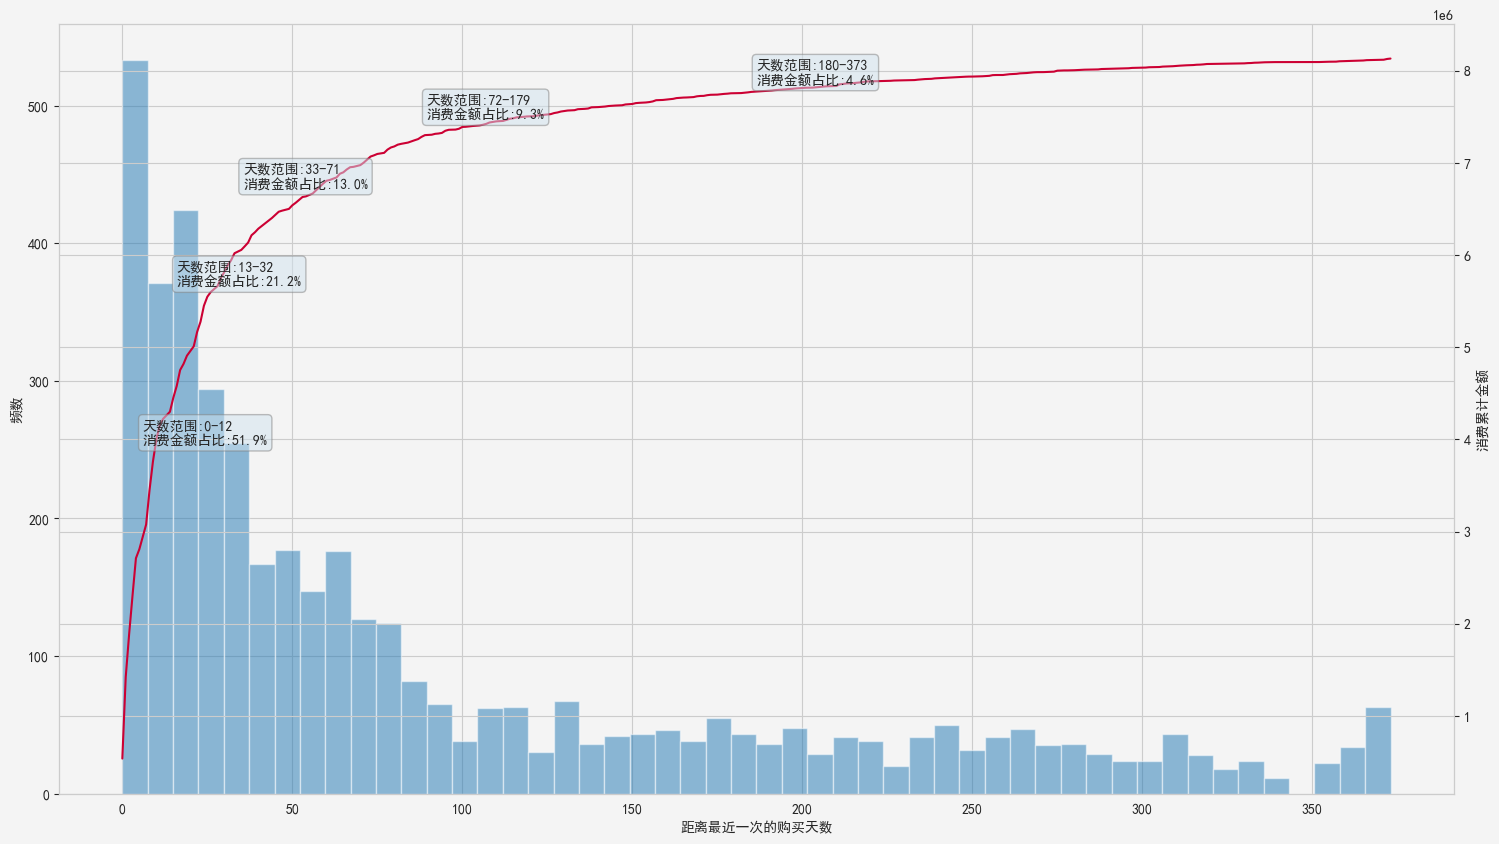

In [21]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig,ax = plt.subplots(figsize=(18, 10), facecolor='#f4f4f4')

# 各天数的消费金额之和
Monetary_sum = pd.concat([R_statistic.Date.value_counts().sort_index(), R_statistic.groupby('Date').Monetary.sum()], axis=1)
# 层级消费金额按照天数范围从小到大的累计之和---sumsum不是sum
Monetary_range = R_label_statistic['Monetary', 'sum'].cumsum().tolist()
# 频数分布图
ax.hist(R_statistic.Date, bins=50, alpha=0.5)  
ax1 = ax.twinx()
ax1.plot(Monetary_sum.Monetary.cumsum(), color='#cc0033')
# 文字标注
for i in range(5):
    ax1.text(
        R_bins[i]/2,
        Monetary_range[i],
        '天数范围:' + str(R_label_statistic['范围'].tolist()[i])+ '\n' + '消费金额占比:' + str(R_label_statistic['Monetary','占比'].tolist()[i]),
        va='top',
        ha='left',
        bbox={'boxstyle': 'round',
              'edgecolor':'grey',
              'facecolor':'#d1e3ef',
              'alpha':0.5})

ax.set_xlabel('距离最近一次的购买天数')
ax.set_ylabel('频数')
ax1.set_ylabel('消费累计金额')
ax.set_facecolor('#f4f4f4')
plt.show()


In [22]:
# 自定义边界分箱
F_scores = pd.cut(F,[1, 2, 3, 5, 8, F.max()+1], labels=[1, 2, 3, 4, 5], right=False)  # 消费频次越大越好，所以labels为顺序
# 查看相关统计
F_statistic, F_label_statistic, F_bins = rfm_bins_statistics(F, F_scores, 'Freq')
F_label_statistic


Freq            Monetary            范围
      count     占比          sum     占比       
label                                        
1      1549  35.9%   558265.841   6.9%    0-1
2       866  20.1%   629650.571   7.7%    2-2
3       883  20.4%  1151684.252  14.2%    3-4
4       539  12.5%  1298134.110  16.0%    5-7
5       482  11.2%  4494714.100  55.3%  8-131

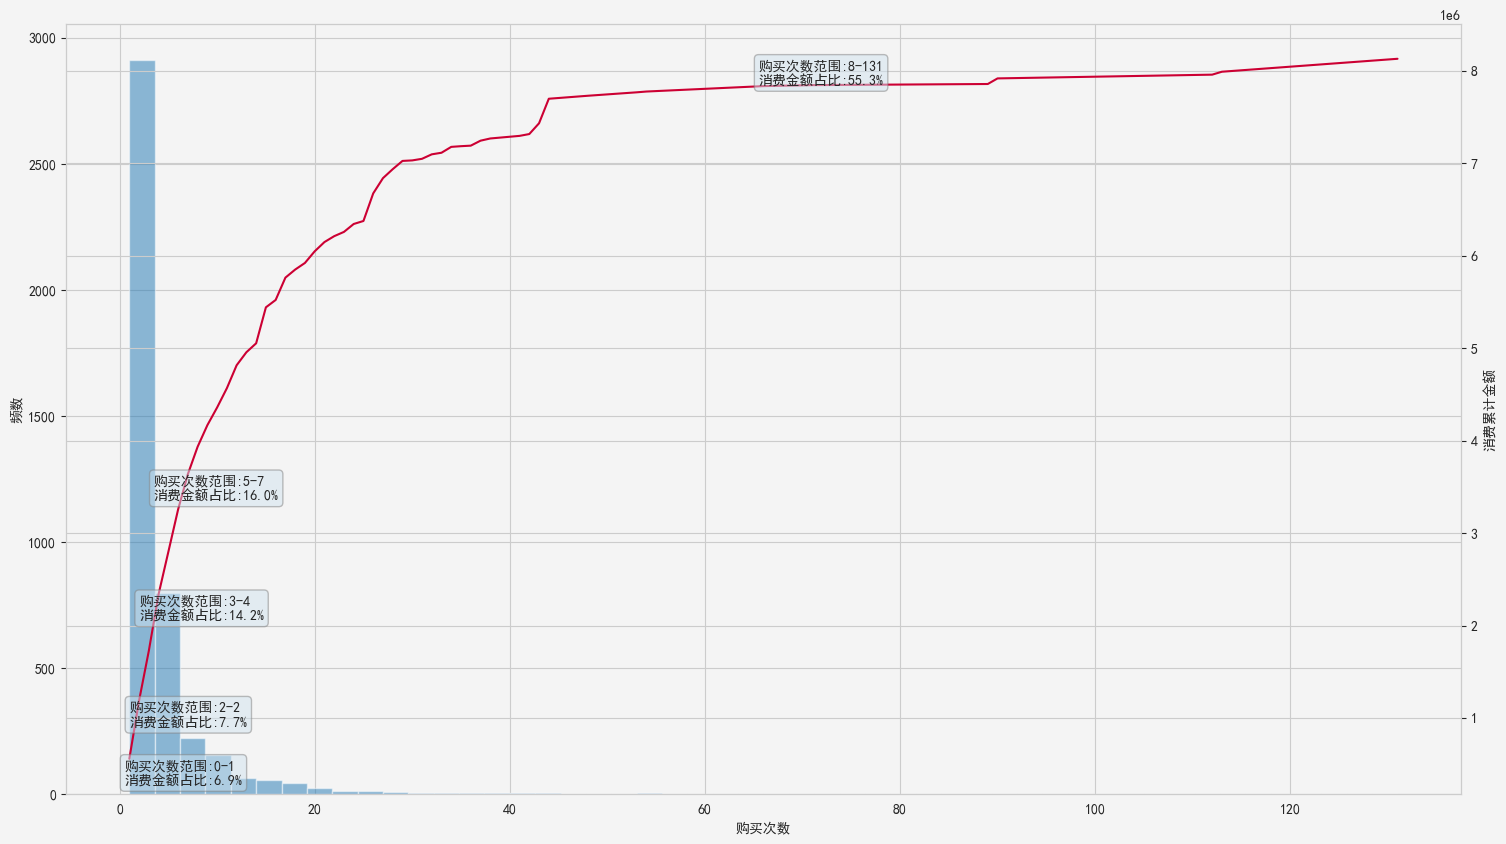

In [23]:
# 绘图
fig,ax = plt.subplots(figsize=(18, 10), facecolor='#f4f4f4')
# 各天数的消费金额之和
Monetary_sum = pd.concat([F_statistic.Freq.value_counts().sort_index(), F_statistic.groupby('Freq').Monetary.sum()], axis=1)
# 层级消费金额按照天数范围从小到大的累计之和---sumsum不是sum
Monetary_range = F_label_statistic['Monetary', 'sum'].cumsum().tolist()
# 频数分布图
ax.hist(F_statistic.Freq, bins=50, alpha=0.5)  
ax1 = ax.twinx()
ax1.plot(Monetary_sum.Monetary.cumsum(), color='#cc0033')
# 文字标注
for i in range(5):
    ax1.text(
        F_bins[i]/2,
        Monetary_range[i],
        '购买次数范围:' + str(F_label_statistic['范围'].tolist()[i])+ '\n' + '消费金额占比:' + str(F_label_statistic['Monetary','占比'].tolist()[i]),
        va='top',
        ha='left',
        bbox={'boxstyle': 'round',
              'edgecolor':'grey',
              'facecolor':'#d1e3ef',
              'alpha':0.5})
ax.set_xlabel('购买次数')
ax.set_ylabel('频数')
ax1.set_ylabel('消费累计金额')
ax.set_facecolor('#f4f4f4')
plt.show()


In [24]:
M_scores =  pd.qcut(M, q=5, duplicates='drop',labels=[1,2,3,4,5])  # 消费金额越大越好，所以labels为顺序
# 查看相关统计
M_statistic = pd.concat([clean_df.groupby('CustomerID').Monetary.sum(), M_scores], axis=1)
M_statistic.columns = ['Monetary', 'label']
M_label_statistic = M_statistic.groupby('label').agg({
            'label':['count',('占比', lambda x: x.count() / M_statistic.label.count())],
            'Monetary':['sum',('占比', lambda x: x.sum() / M_statistic.Monetary.sum())],
        }).sort_values(('Monetary','sum'),ascending = False).round(2)
M_label_statistic

label         Monetary      
      count   占比         sum    占比
label                             
5       864  0.2  5932997.40  0.73
4       864  0.2  1186096.61  0.15
3       863  0.2   582176.19  0.07
2       864  0.2   302999.81  0.04
1       864  0.2   128178.86  0.02

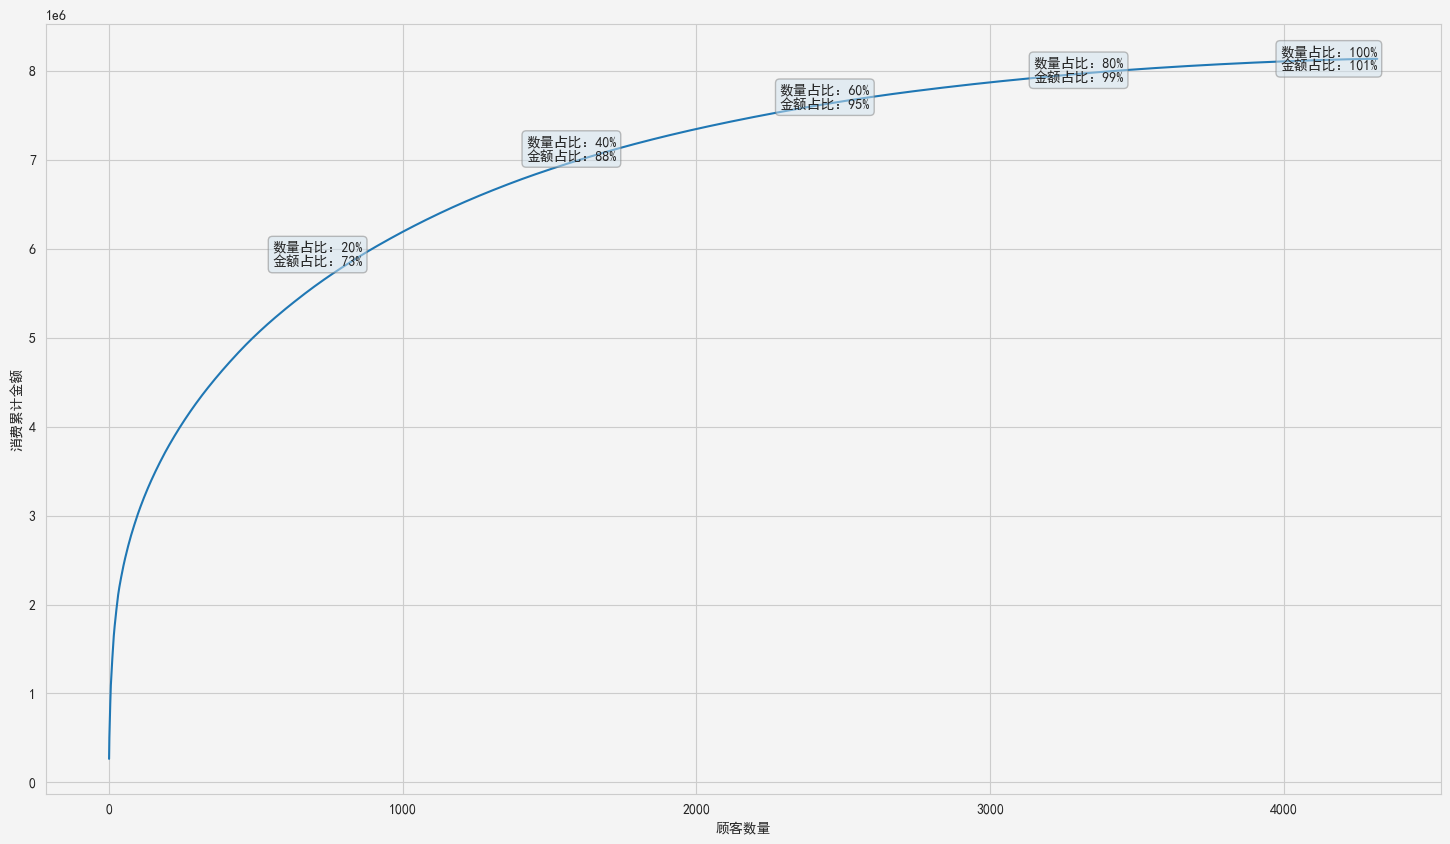

In [25]:
# 绘图
fig,ax = plt.subplots(figsize=(18, 10), facecolor='#f4f4f4')

label_count_cumsum = M_label_statistic.cumsum()['label', 'count'].values
label_percent_cumsum = M_label_statistic.cumsum()['label', '占比'].values
Monetary_sum_cumsum = M_label_statistic.cumsum()['Monetary', 'sum'].values
Monetary_percent_cumsum = M_label_statistic.cumsum()['Monetary', '占比'].values

ax.plot(M_statistic.Monetary.sort_values(ascending=False).cumsum().values)
for i in range(5):
    ax.text(label_count_cumsum[i],
            Monetary_sum_cumsum[i],
            '数量占比：%.0f%%'%(label_percent_cumsum[i]*100)+'\n'+'金额占比：%.0f%%'%(Monetary_percent_cumsum[i]*100), 
            va='center', 
            ha='right',
            bbox={
                'boxstyle': 'round',
                'edgecolor':'grey',
                'facecolor':'#d1e3ef',
                'alpha':0.5 })
ax.set_xlabel('顾客数量')
ax.set_ylabel('消费累计金额')
ax.set_facecolor('#f4f4f4')
plt.show()


In [26]:
# 合并
RFM = pd.concat([R_scores,F_scores,M_scores],axis=1)
RFM.columns = ['R_scores', 'F_scores', 'M_scores']
# 绘制R F M 得分交叉表
pd.pivot_table(RFM, index = ['R_scores','F_scores'], columns=['M_scores'], aggfunc=len)


M_scores               1      2     3      4      5
R_scores F_scores                                  
5        1          33.0   27.0   8.0    2.0    NaN
         2          16.0   42.0  41.0   23.0    2.0
         3           4.0   13.0  61.0   74.0   30.0
         4           2.0    NaN  13.0   82.0   91.0
         5           NaN    NaN   1.0   28.0  271.0
4        1          91.0   59.0  20.0    6.0    1.0
         2          18.0   54.0  73.0   24.0    6.0
         3           NaN   17.0  74.0  103.0   35.0
         4           NaN    1.0  14.0   79.0   80.0
         5           NaN    NaN   1.0   14.0  109.0
3        1         130.0  110.0  46.0   18.0    5.0
         2          21.0   49.0  74.0   35.0   11.0
         3           4.0   14.0  69.0   83.0   39.0
         4           NaN    1.0  10.0   41.0   57.0
         5           NaN    NaN   1.0   11.0   30.0
2        1         149.0  114.0  63.0   20.0    7.0
         2          25.0   55.0  92.0   43.0   10.0
         3           5.0   30.0  60.0   86.0   29.0
         4           1.0    1.0   6.0   21.0   28.0
         5           NaN    NaN   3.0    4.0    8.0
1        1         344.0  210.0  59.0   23.0    4.0
         2          18.0   54.0  50.0   25.0    5.0
         3           3.0   12.0  21.0   15.0    2.0
         4           NaN    1.0   3.0    4.0    3.0
         5           NaN    NaN   NaN    NaN    1.0

In [27]:
# 格式转换
for i in RFM.columns:
    RFM[i] = RFM[i].astype(float)

# 将每个值按照R/F/M均值大小分别定义其价值高低
for i,j in enumerate(['R', 'F', 'M']):
    RFM[j] = np.where(RFM.iloc[:,i] > RFM.iloc[:,i].mean(), '高', '低')

# 创造综合价值变量
RFM['Value'] = RFM['R'] + RFM['F'] +RFM['M'] 

map_dict = {'高高高':'重要价值客户', '高低高':'重要发展客户', '低高高':'重要保持客户', '低低高':'重要挽留客户','高高低':'一般价值客户', '高低低':'一般发展客户', '低高低':'一般保持客户', '低低低':'流失客户'}
RFM['CustmerLevel'] = RFM['Value'].map(map_dict)
RFM.head()


,R_scores,F_scores,M_scores,R,F,M,Value,CustmerLevel
CustomerID,,,,,,,,
12347,5.0,4.0,5.0,高,高,高,高高高,重要价值客户
12348,2.0,3.0,4.0,低,高,高,低高高,重要保持客户
12349,4.0,1.0,4.0,高,低,高,高低高,重要发展客户
12350,1.0,1.0,2.0,低,低,低,低低低,流失客户
12352,3.0,4.0,4.0,低,高,高,低高高,重要保持客户


In [28]:
# 计算出每个客户的消费总金额，下单总数，下单的产品总数
data_temp = clean_df.groupby('CustomerID').agg({'Monetary':np.sum, 'Quantity':np.sum, 'InvoiceNo':'nunique'})
RFM_data = pd.concat([RFM['CustmerLevel'], data_temp, R_days, F],axis=1)
RFM_data.columns = ['客户等级','消费金额', '购买商品总量', '订单总量', '最近消费天数', '消费次数']
RFM_data.head()


,客户等级,消费金额,购买商品总量,订单总量,最近消费天数,消费次数
CustomerID,,,,,,
12347,重要价值客户,4310.00,2458,7,2,7
12348,重要保持客户,1797.24,2341,4,75,4
12349,重要发展客户,1457.55,630,1,18,1
12350,流失客户,334.40,197,1,310,1
12352,重要保持客户,1665.74,533,7,36,7


In [29]:
# 定义一个统计函数
def customer_level_statistic(customer_data):
    customer_level = (customer_data
                 .groupby('客户等级')
                 .agg({
                        '消费金额':[('均值', 'mean'),
                                    ('总量', 'sum'),
                                    ('占比', lambda x: "%.1f"%((x.sum()/ customer_data['消费金额'].sum()*100))+'%')], 
                        '购买商品总量':[('均值', 'mean'),
                                        ('总量', 'sum'),
                                       ('占比', lambda x:"%.1f"%((x.sum()/ customer_data['购买商品总量'].sum()*100))+'%')],
                        '订单总量':[('均值', 'mean'),
                                    ('总量', 'sum'),
                                    ('占比', lambda x:"%.1f"%((x.sum()/ customer_data['订单总量'].sum()*100))+'%')],
                        '客户等级':[('数量', 'count'),
                                    ('占比', lambda x:"%.1f"%((x.count()/ customer_data['客户等级'].count()*100))+'%')],
                        '最近消费天数':[('均值','mean')],
                        '消费次数':[('均值','mean')],
                    })
                 .sort_values(('消费金额','总量'),ascending=False)
                 .assign(客单价 = lambda x : x['消费金额','总量'] / x['订单总量','总量'])
                 .round(1)
                 )
    customer_level.columns = pd.Index(customer_level.columns[:-1].tolist() + [('客单价', '均值')])
    return customer_level

RFM_level = customer_level_statistic(RFM_data)
RFM_level


消费金额                    购买商品总量                  订单总量                \
            均值         总量     占比      均值       总量     占比    均值     总量     占比   
客户等级                                                                           
重要价值客户  5555.5  5533317.7  68.0%  3110.2  3097805  66.9%  10.7  10656  58.0%   
重要保持客户  2457.9  1135550.1  14.0%  1436.1   663484  14.3%   5.6   2571  14.0%   
流失客户     335.4   557832.4   6.9%   202.1   336024   7.3%   1.3   2169  11.8%   
重要挽留客户  1704.7   351174.6   4.3%   949.1   195515   4.2%   2.0    403   2.2%   
一般发展客户   373.1   179857.8   2.2%   244.6   117914   2.5%   1.6    761   4.1%   
一般保持客户   583.7   142996.6   1.8%   338.2    82857   1.8%   3.7    899   4.9%   
一般价值客户   660.0   132668.1   1.6%   406.1    81624   1.8%   3.9    784   4.3%   
重要发展客户  1547.7    99051.6   1.2%   884.6    56615   1.2%   2.1    134   0.7%   

        客户等级        最近消费天数 消费次数    客单价  
          数量     占比     均值   均值     均值  
客户等级                                    
重要价值客户   996  23.1%   12.4  9.4  519.3  
重要保持客户   462  10.7%   79.8  5.1  441.7  
流失客户    1663  38.5%  169.6  1.3  257.2  
重要挽留客户   206   4.8%  133.5  1.6  871.4  
一般发展客户   482  11.2%   17.1  1.5  236.3  
一般保持客户   245   5.7%  107.7  3.6  159.1  
一般价值客户   201   4.7%   14.9  3.8  169.2  
重要发展客户    64   1.5%   15.5  1.9  739.2

In [30]:
# 合并数据
k_data = pd.concat([R_days, F, M], axis=1)
k_data.columns = ['R', 'F', 'M']


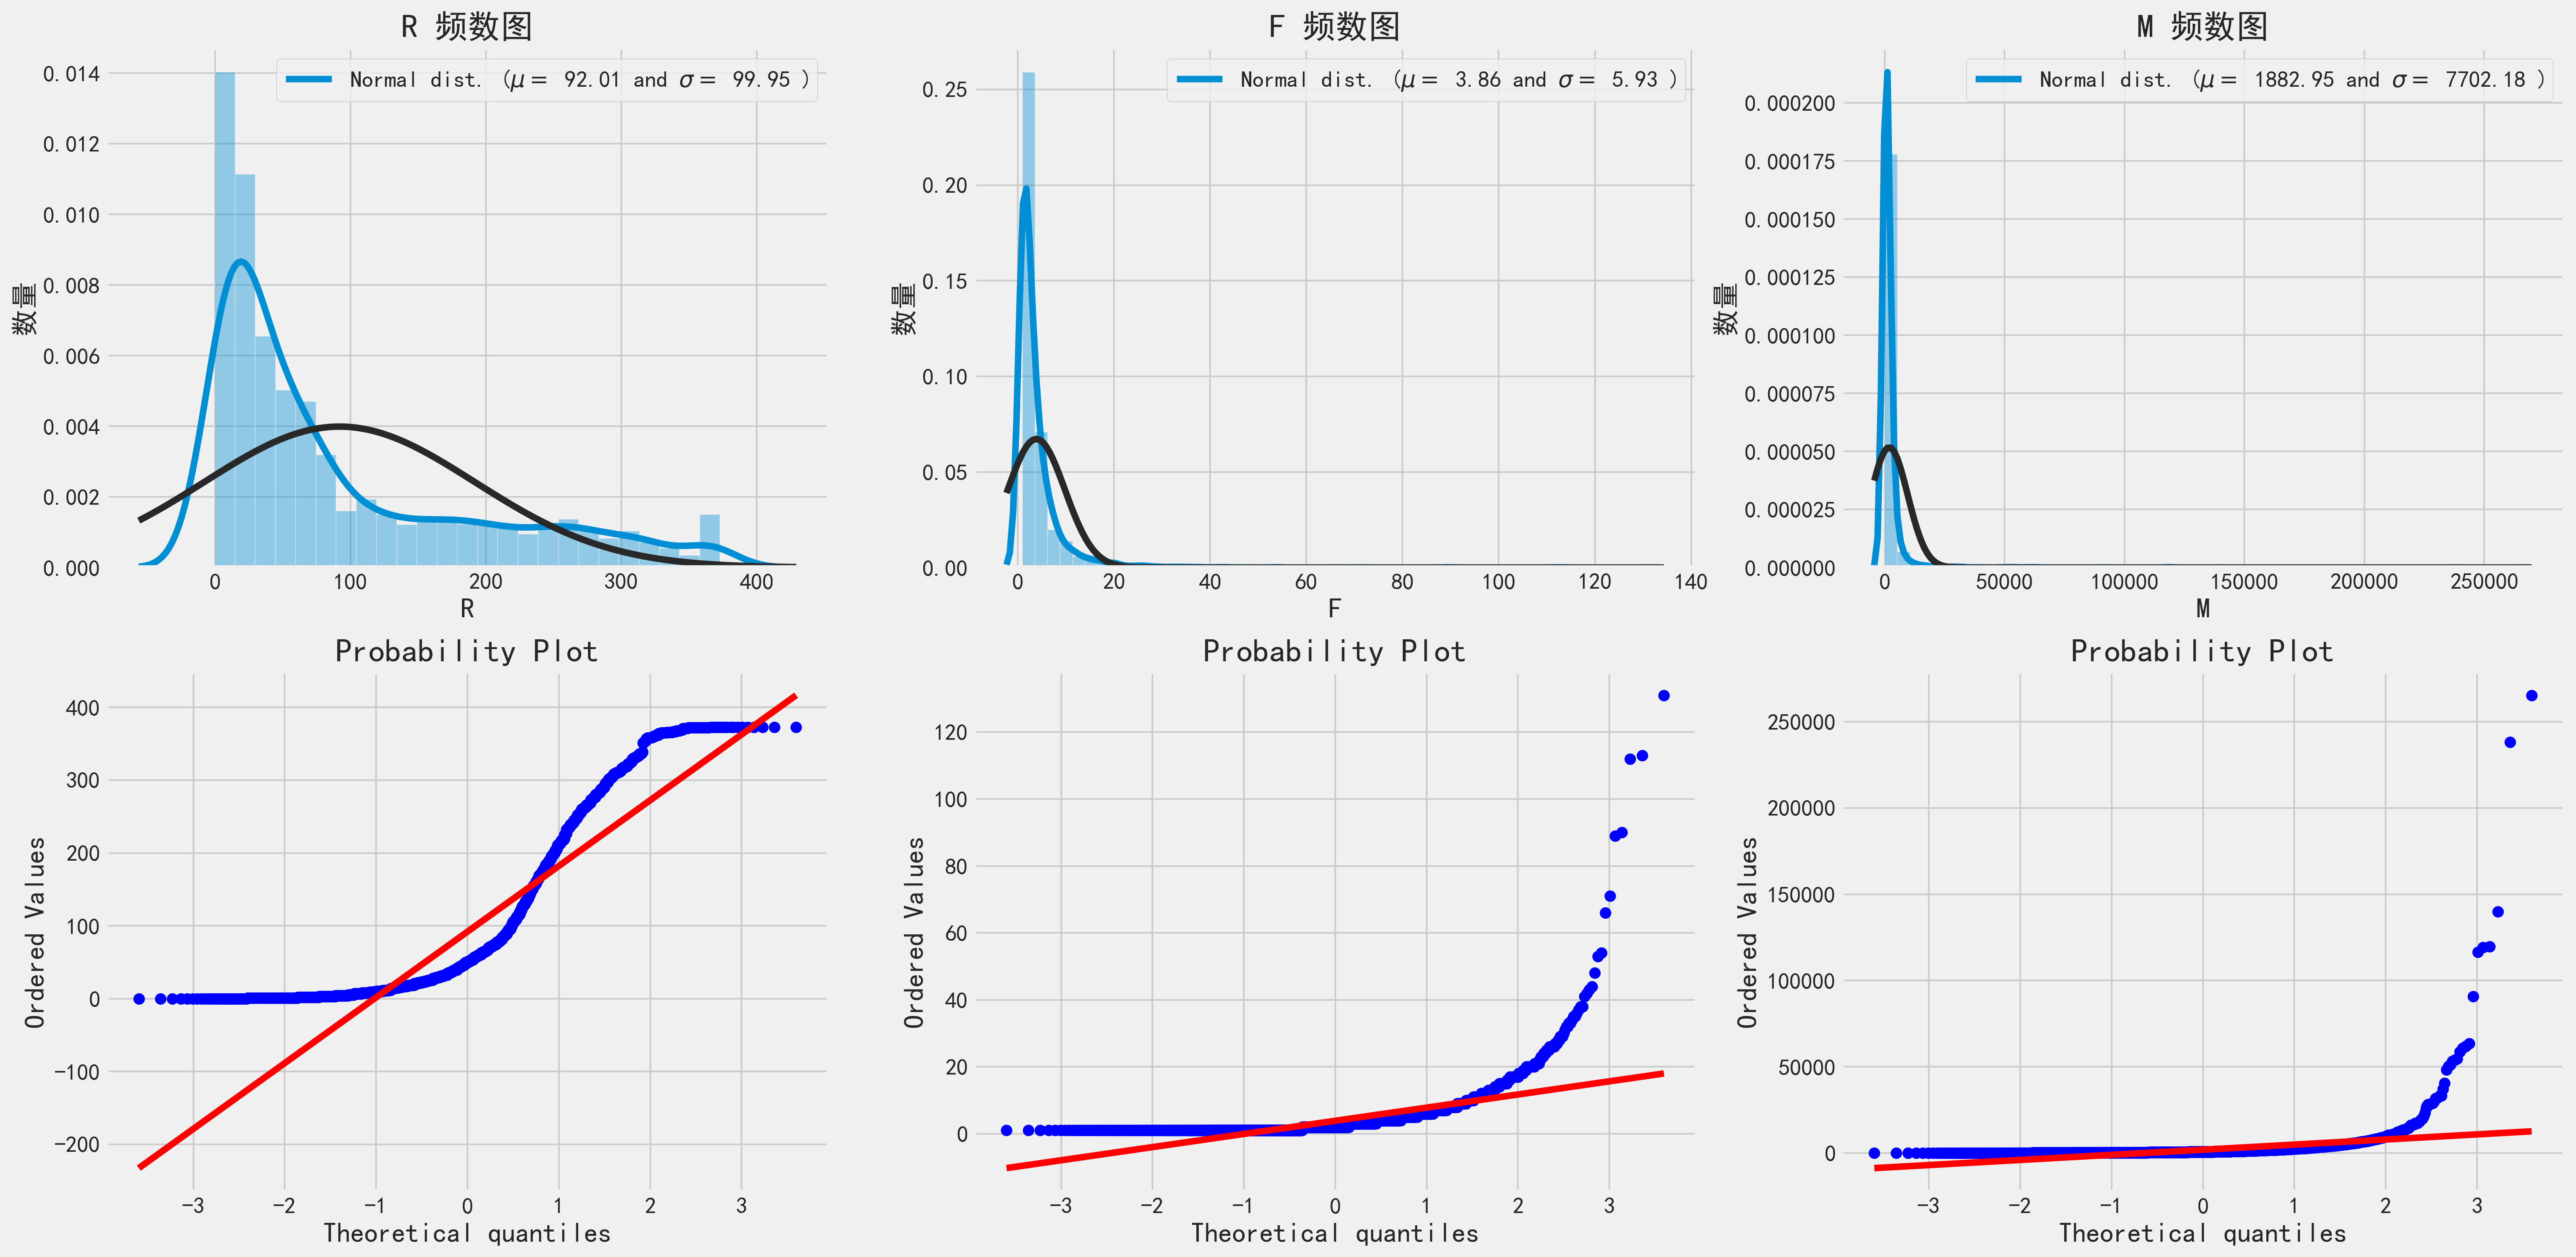

In [31]:
from scipy import stats
from scipy.stats import norm, skew 
plt.style.use('fivethirtyeight')

def draw_dist_prob(data):    
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24, 12), dpi=300)
    
    for i,j in enumerate(['R', 'F', 'M']):
        sns.distplot(data[j], fit=norm, ax=ax[0][i])
        (mu, sigma) = norm.fit(data[j])
        ax[0][i].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
        ax[0][i].set_ylabel('数量')
        ax[0][i].set_title('{} 频数图'.format(j))
    
        stats.probplot(data[j], plot=ax[1][i])

draw_dist_prob(k_data)


In [32]:
pd.DataFrame([i for i in zip(k_data.columns,k_data.skew(),k_data.kurt())],
             columns=['特征','偏度','峰度'])

,特征,偏度,峰度
0,R,1.245655,0.430733
1,F,8.841225,133.594888
2,M,21.149257,591.458155


In [33]:
# R中存在0值，进行box-cox转换时存在0值会将其转变成无穷大，所以将所有的值加上一个很小的数全部变成正数
k_data.R = k_data.R + 0.0001
# boxcox转换
k_data_bc = k_data.copy()
for i in k_data_bc.columns:  # 自动计算λ
    k_data_bc[i], _ = stats.boxcox(k_data_bc[i])
# 查看偏度、峰度
pd.DataFrame([i for i in zip(k_data_bc.columns, k_data_bc.skew(), k_data_bc.kurt())], 
             columns=['特征', '偏度', '峰度'])


,特征,偏度,峰度
0,R,-0.070121,-0.586750
1,F,0.153827,-1.248544
2,M,-0.013838,0.550046


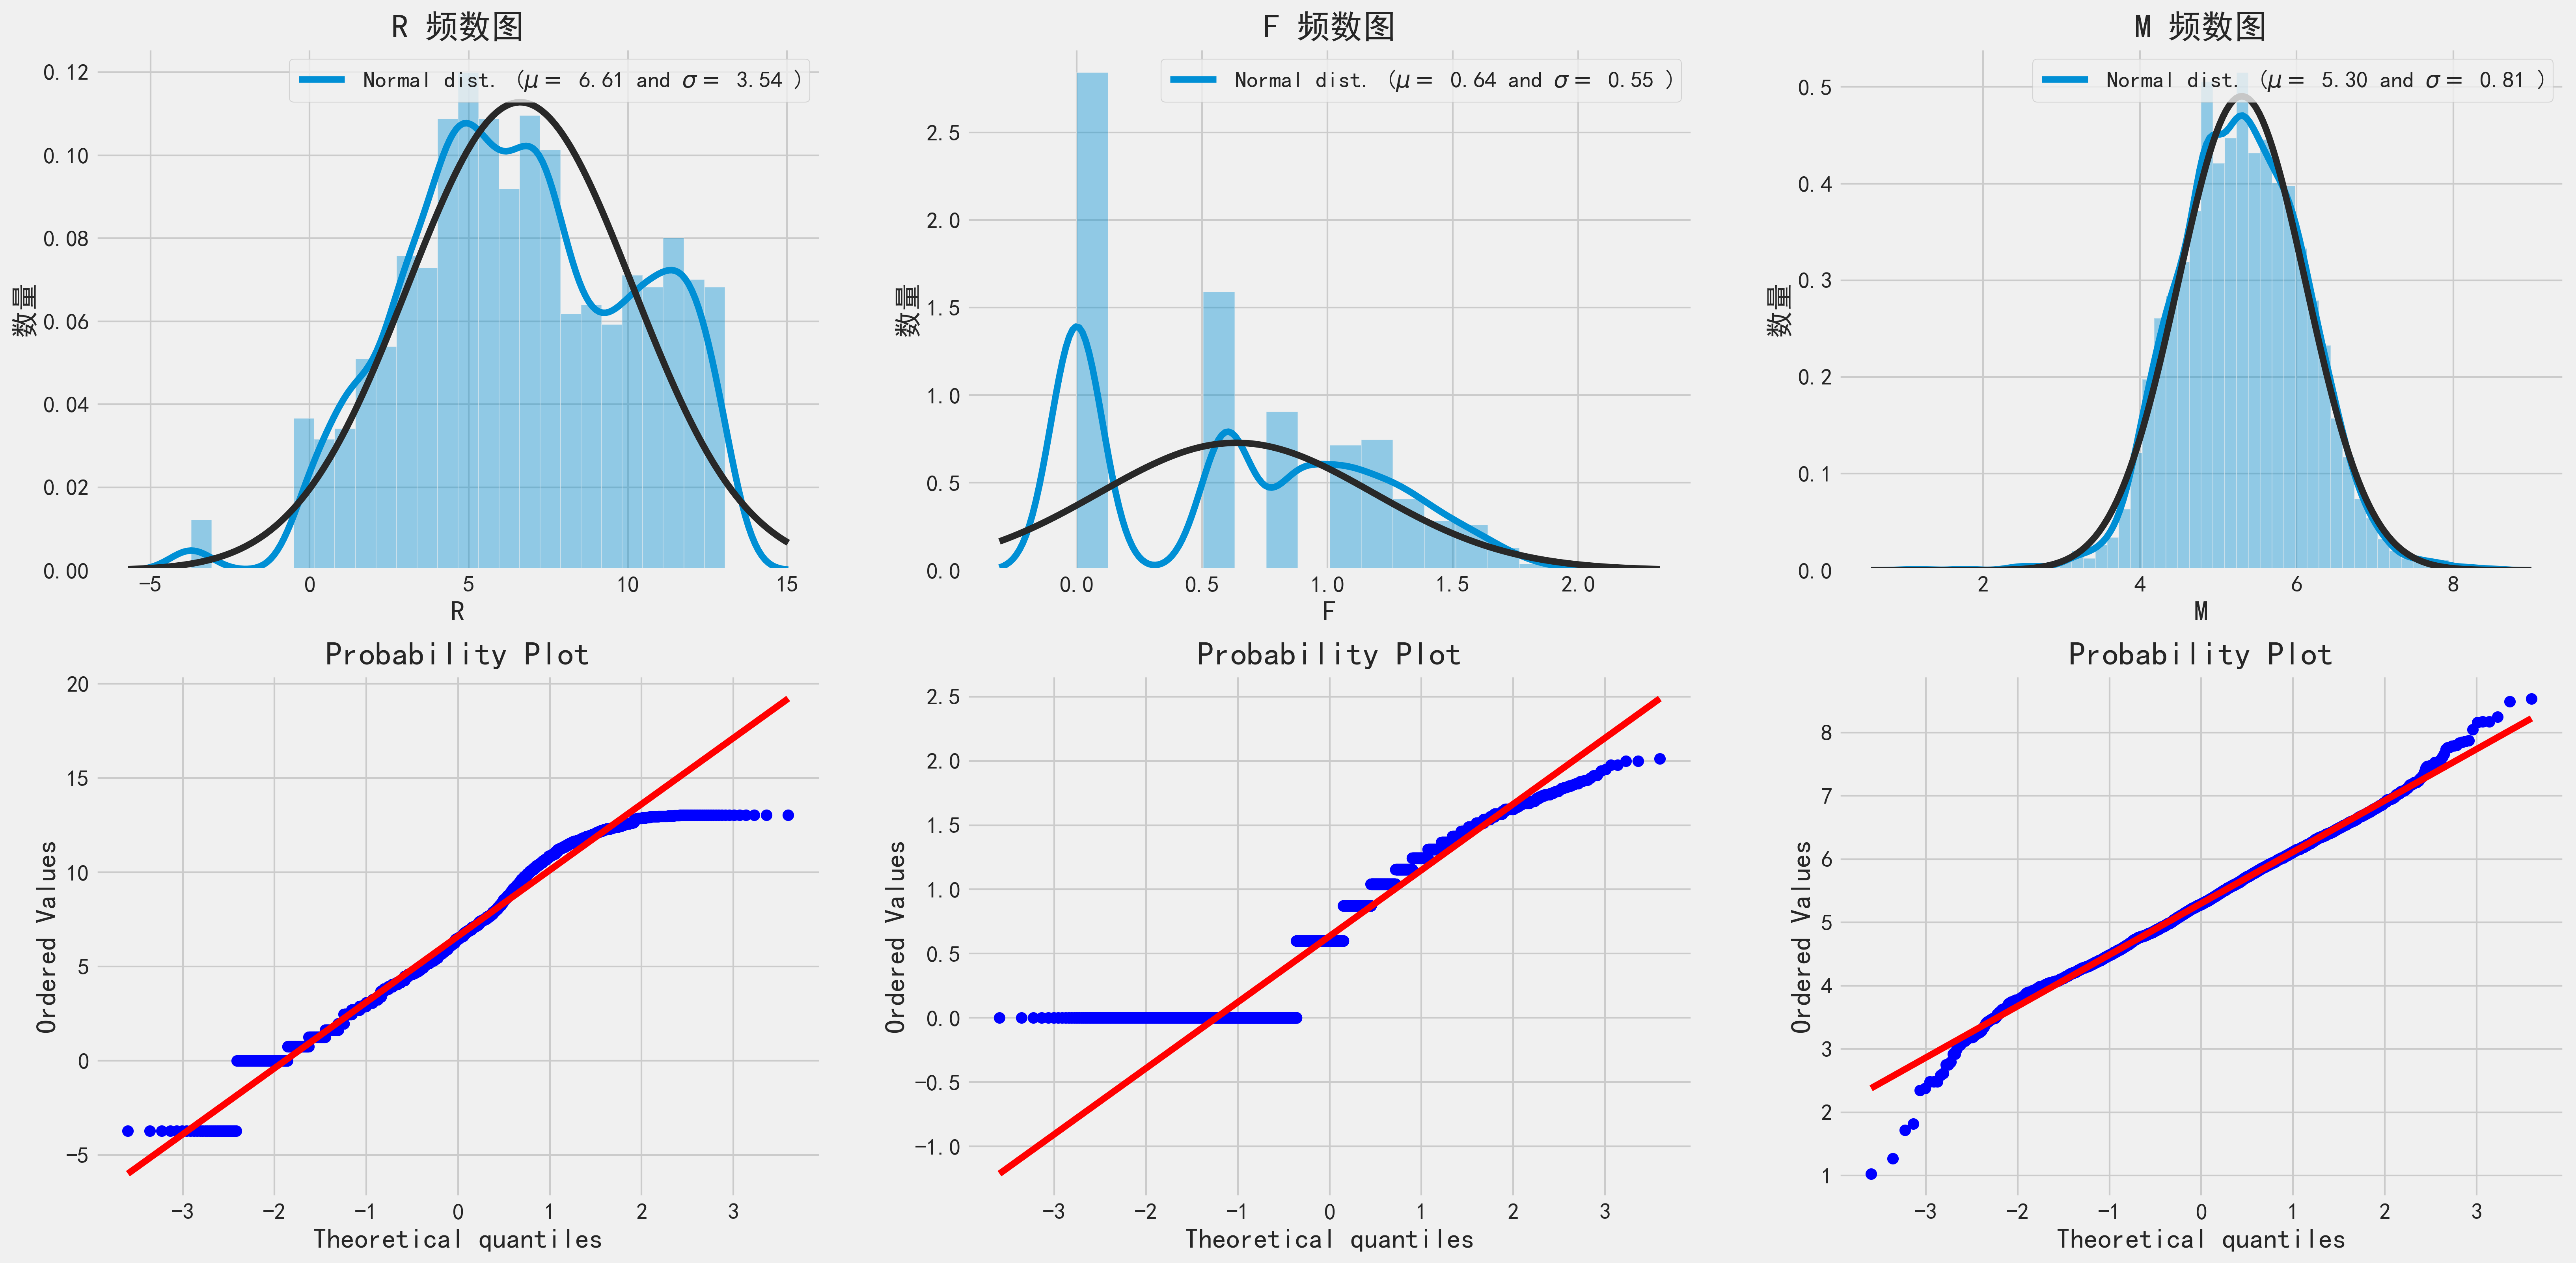

In [34]:
draw_dist_prob(k_data_bc)

In [35]:
# K-means 的本质是基于欧式距离的数据划分算法，均值和方差大的维度将对数据的聚类产生决定性影响。
# 使用标准化对数据进行预处理可以减小不同量纲的影响。
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(k_data)
data_scaler = standard_scaler.transform(k_data)
k_data_scaler = pd.DataFrame(data_scaler, columns = ['R', 'F', 'M'], index = k_data.index)
k_data_scaler.head()


,R,F,M
CustomerID,,,
12347,-0.900583,0.529649,0.315112
12348,-0.170219,0.024038,-0.011128
12349,-0.740503,-0.481573,-0.055231
12350,2.180952,-0.481573,-0.201053
12352,-0.560413,0.529649,-0.028201


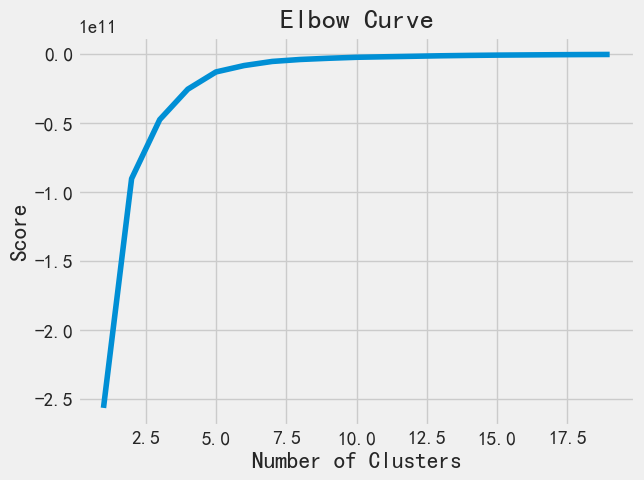

In [36]:
from sklearn.cluster import KMeans

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(k_data).score(k_data) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

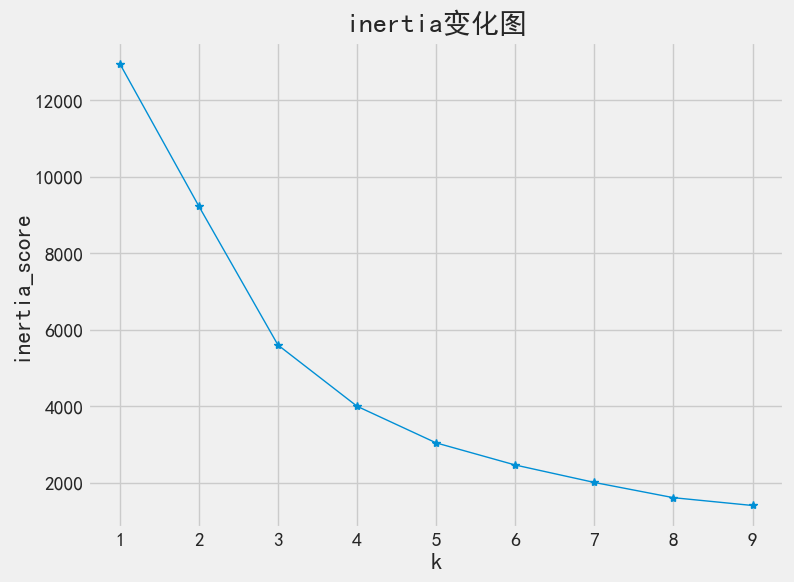

In [37]:
from sklearn.cluster import KMeans
# 选择K的范围 ，遍历每个值进行评估
inertia_list = []
for k in range(1,10):
    model = KMeans(n_clusters = k, max_iter = 500, random_state = 12)
    kmeans = model.fit(k_data_scaler)
    inertia_list.append(kmeans.inertia_)

# 绘图
fig,ax = plt.subplots(figsize=(8,6))    
ax.plot(range(1,10), inertia_list, '*-', linewidth=1)
ax.set_xlabel('k')
ax.set_ylabel("inertia_score") 
ax.set_title('inertia变化图')
plt.show()


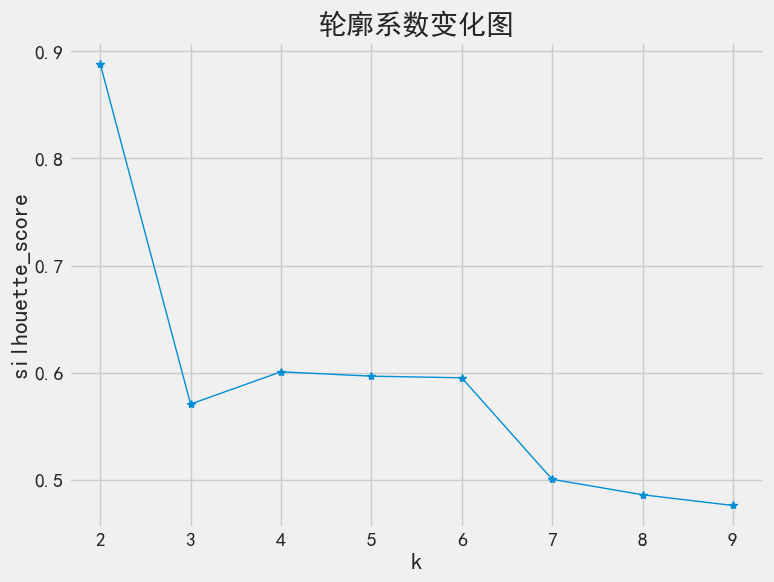

In [38]:
from sklearn import metrics

label_list = []
silhouette_score_list = []
for k in range(2,10):
    model = KMeans(n_clusters = k, max_iter = 500, random_state=123 )
    kmeans = model.fit(k_data_scaler)
    silhouette_score = metrics.silhouette_score(k_data_scaler, kmeans.labels_)  # 轮廓系数
    silhouette_score_list.append(silhouette_score)
    label_list.append({k: kmeans.labels_})
    
# 绘图
fig,ax = plt.subplots(figsize=(8,6))    
ax.plot(range(2,10), silhouette_score_list, '*-', linewidth=1)
ax.set_xlabel('k')
ax.set_ylabel("silhouette_score") 
ax.set_title('轮廓系数变化图')
plt.show()


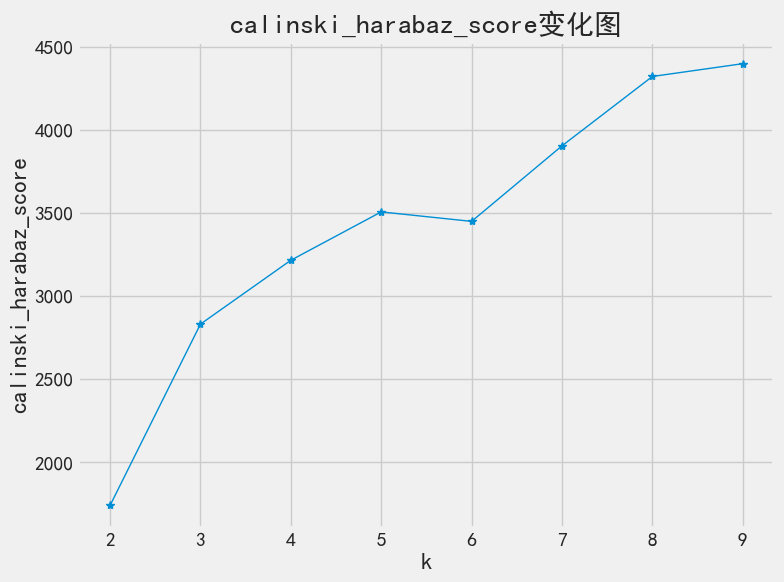

In [39]:
calinski_harabaz_score_list = []
for i in range(2,10):
    model = KMeans(n_clusters = i, random_state=1234)
    kmeans = model.fit(k_data_scaler)
    calinski_harabaz_score = metrics.calinski_harabasz_score(k_data_scaler, kmeans.labels_)
    calinski_harabaz_score_list.append(calinski_harabaz_score)

# 绘图
fig,ax = plt.subplots(figsize=(8,6))    
ax.plot(range(2,10), calinski_harabaz_score_list, '*-', linewidth=1)
ax.set_xlabel('k')
ax.set_ylabel("calinski_harabaz_score") 
ax.set_title('calinski_harabaz_score变化图')
plt.show()


In [68]:
model = KMeans(n_clusters = 4)
kmeans = model.fit(k_data_scaler)
k_data['label'] = kmeans.labels_
k_data_scaler['label'] = kmeans.labels_

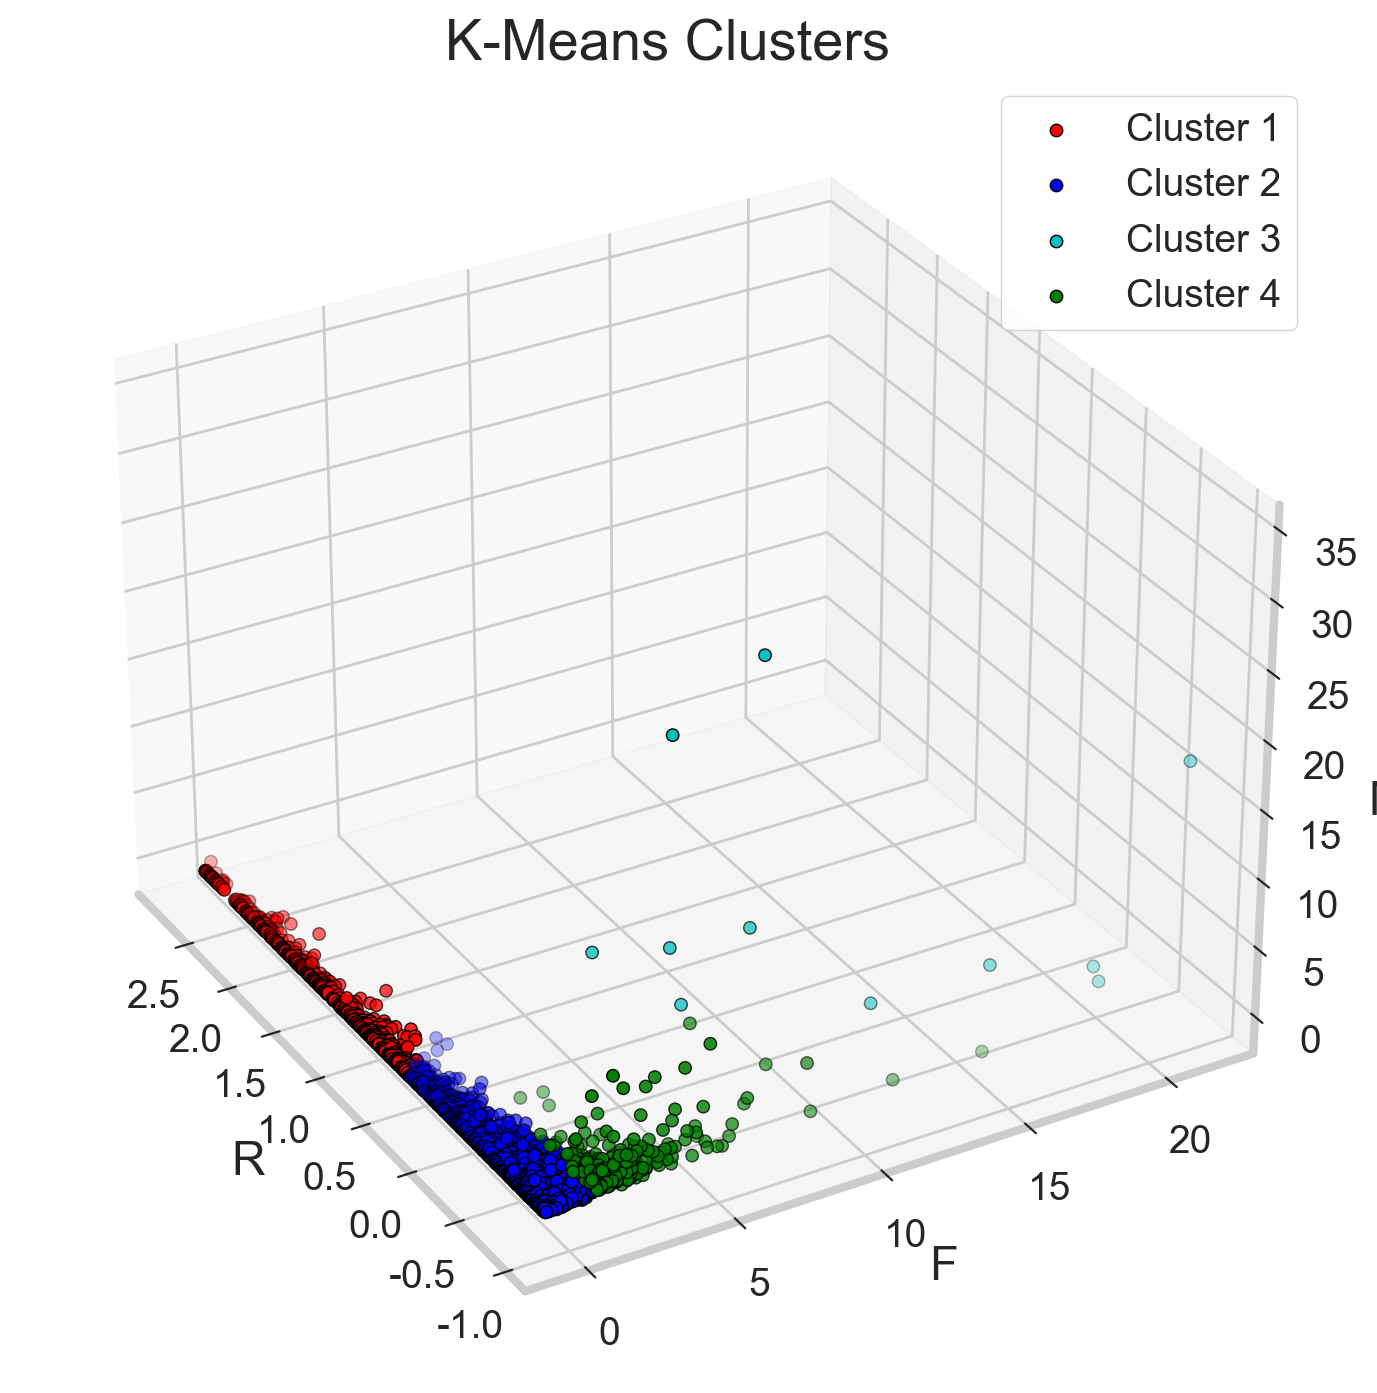

In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12, 8), dpi=200)
ax = fig.add_subplot(111, projection='3d', elev=30, azim=-30)

ax1 = ax.scatter(k_data_scaler.query("label == 0").R, k_data_scaler.query("label == 0").F, 
                  k_data_scaler.query("label == 0").M, edgecolor='k', color='r')
ax2 = ax.scatter(k_data_scaler.query("label == 1").R, k_data_scaler.query("label == 1").F, 
                  k_data_scaler.query("label == 1").M, edgecolor='k', color='b')
ax3 = ax.scatter(k_data_scaler.query("label == 2").R, k_data_scaler.query("label == 2").F, 
                  k_data_scaler.query("label == 2").M, edgecolor='k', color='c')
ax4 = ax.scatter(k_data_scaler.query("label == 3").R, k_data_scaler.query("label == 3").F, 
                  k_data_scaler.query("label == 3").M, edgecolor='k', color='g')


ax.legend([ax1, ax2, ax3, ax4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
ax.invert_xaxis()
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')
ax.set_title('K-Means Clusters')
plt.show()


In [93]:
# 选出每个客户的消费总金额，下单总数，下单的产品总数
data_temp = clean_df.groupby('CustomerID').agg({'Quantity':np.sum, 'InvoiceNo':'nunique'})
kmeans_data = pd.concat([k_data, data_temp],axis=1)
kmeans_data.columns = ['最近消费天数', '消费次数', '消费金额', '客户等级', '购买商品总量','订单总量']
kmeans_level = customer_level_statistic(kmeans_data)

kmeans_level.index = [ '一般价值客户','高价值客户','头部价值客户', '低价值客户']

kmeans_level


消费金额                     购买商品总量                  订单总量         \
              均值         总量     占比       均值       总量     占比    均值     总量   
一般价值客户    1261.5  3766740.8  46.3%    753.7  2250517  48.6%   3.5  10440   
高价值客户     9908.8  2586200.2  31.8%   5535.6  1444796  31.2%  20.2   5265   
头部价值客户  116496.1  1281457.1  15.8%  60595.8   666554  14.4%  90.8    999   
低价值客户      469.4   498050.7   6.1%    254.4   269971   5.8%   1.6   1673   

               客户等级        最近消费天数  消费次数     客单价  
           占比    数量     占比     均值    均值      均值  
一般价值客户  56.8%  2986  69.1%   44.0   3.3   360.8  
高价值客户   28.6%   261   6.0%   10.1  17.7   491.2  
头部价值客户   5.4%    11   0.3%    4.4  63.2  1282.7  
低价值客户    9.1%  1061  24.6%  248.1   1.5   297.7

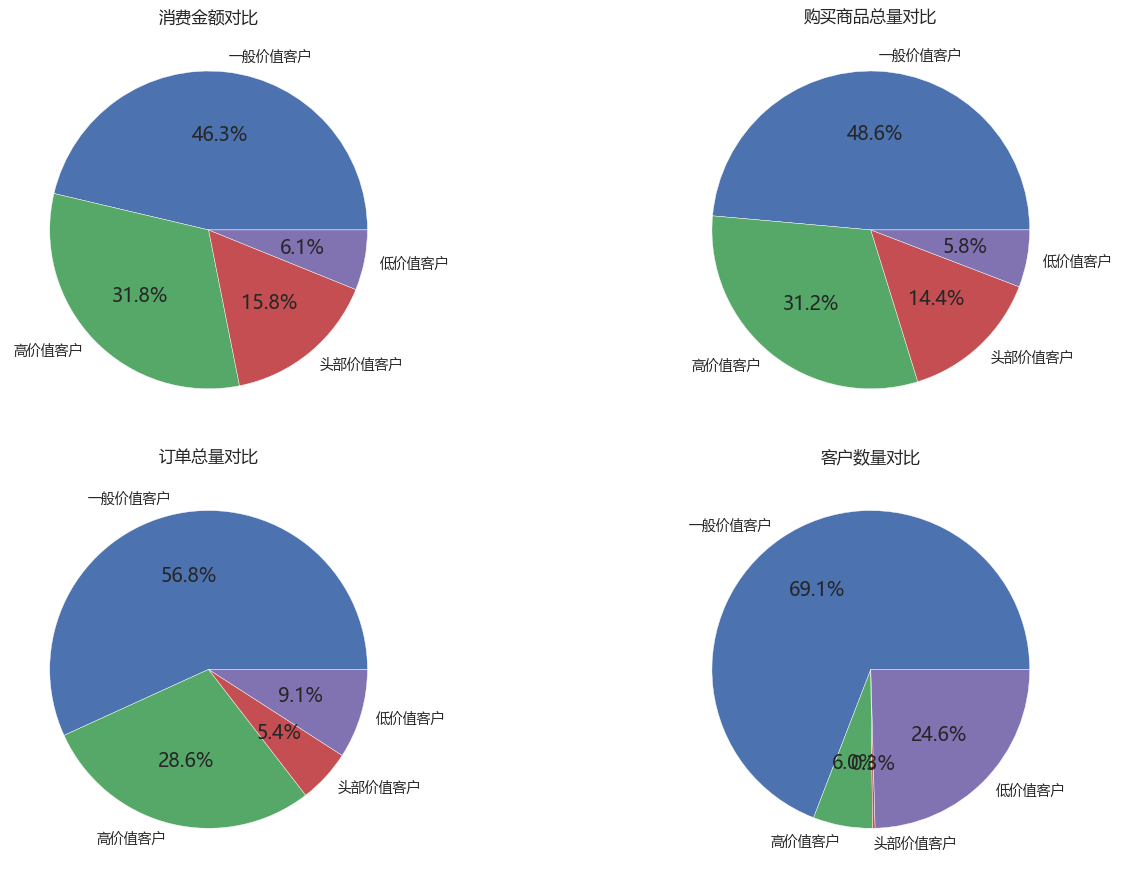

In [92]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False

def customer_level_pie(value, name):
    # 获取数据
    type = value.index.tolist()
    Monetary = value['消费金额', '总量'].astype(float).round(1).tolist()
    ProductQuantity = value['购买商品总量', '总量'].astype(int).tolist()
    OrderNunique = value['订单总量', '总量'].astype(int).tolist()
    Num = value['客户等级', '数量'].astype(int).tolist()

    fig, axs = plt.subplots(2, 2, figsize=(16, 9))
    
    # 绘制消费金额对比
    axs[0, 0].pie(Monetary, labels=type, autopct='%1.1f%%')
    axs[0, 0].set_title('消费金额对比')

    # 绘制购买商品总量对比
    axs[0, 1].pie(ProductQuantity, labels=type, autopct='%1.1f%%')
    axs[0, 1].set_title('购买商品总量对比')

    # 绘制订单总量对比
    axs[1, 0].pie(OrderNunique, labels=type, autopct='%1.1f%%')
    axs[1, 0].set_title('订单总量对比')

    # 绘制客户数量对比
    axs[1, 1].pie(Num, labels=type, autopct='%1.1f%%')
    axs[1, 1].set_title('客户数量对比')

    # 调整布局
    plt.tight_layout()

    # 保存图片
    plt.savefig("{}指标对比图.png".format(name), dpi=300, bbox_inches='tight', pad_inches=0.5)

customer_level_pie(kmeans_level, 'K-Means')


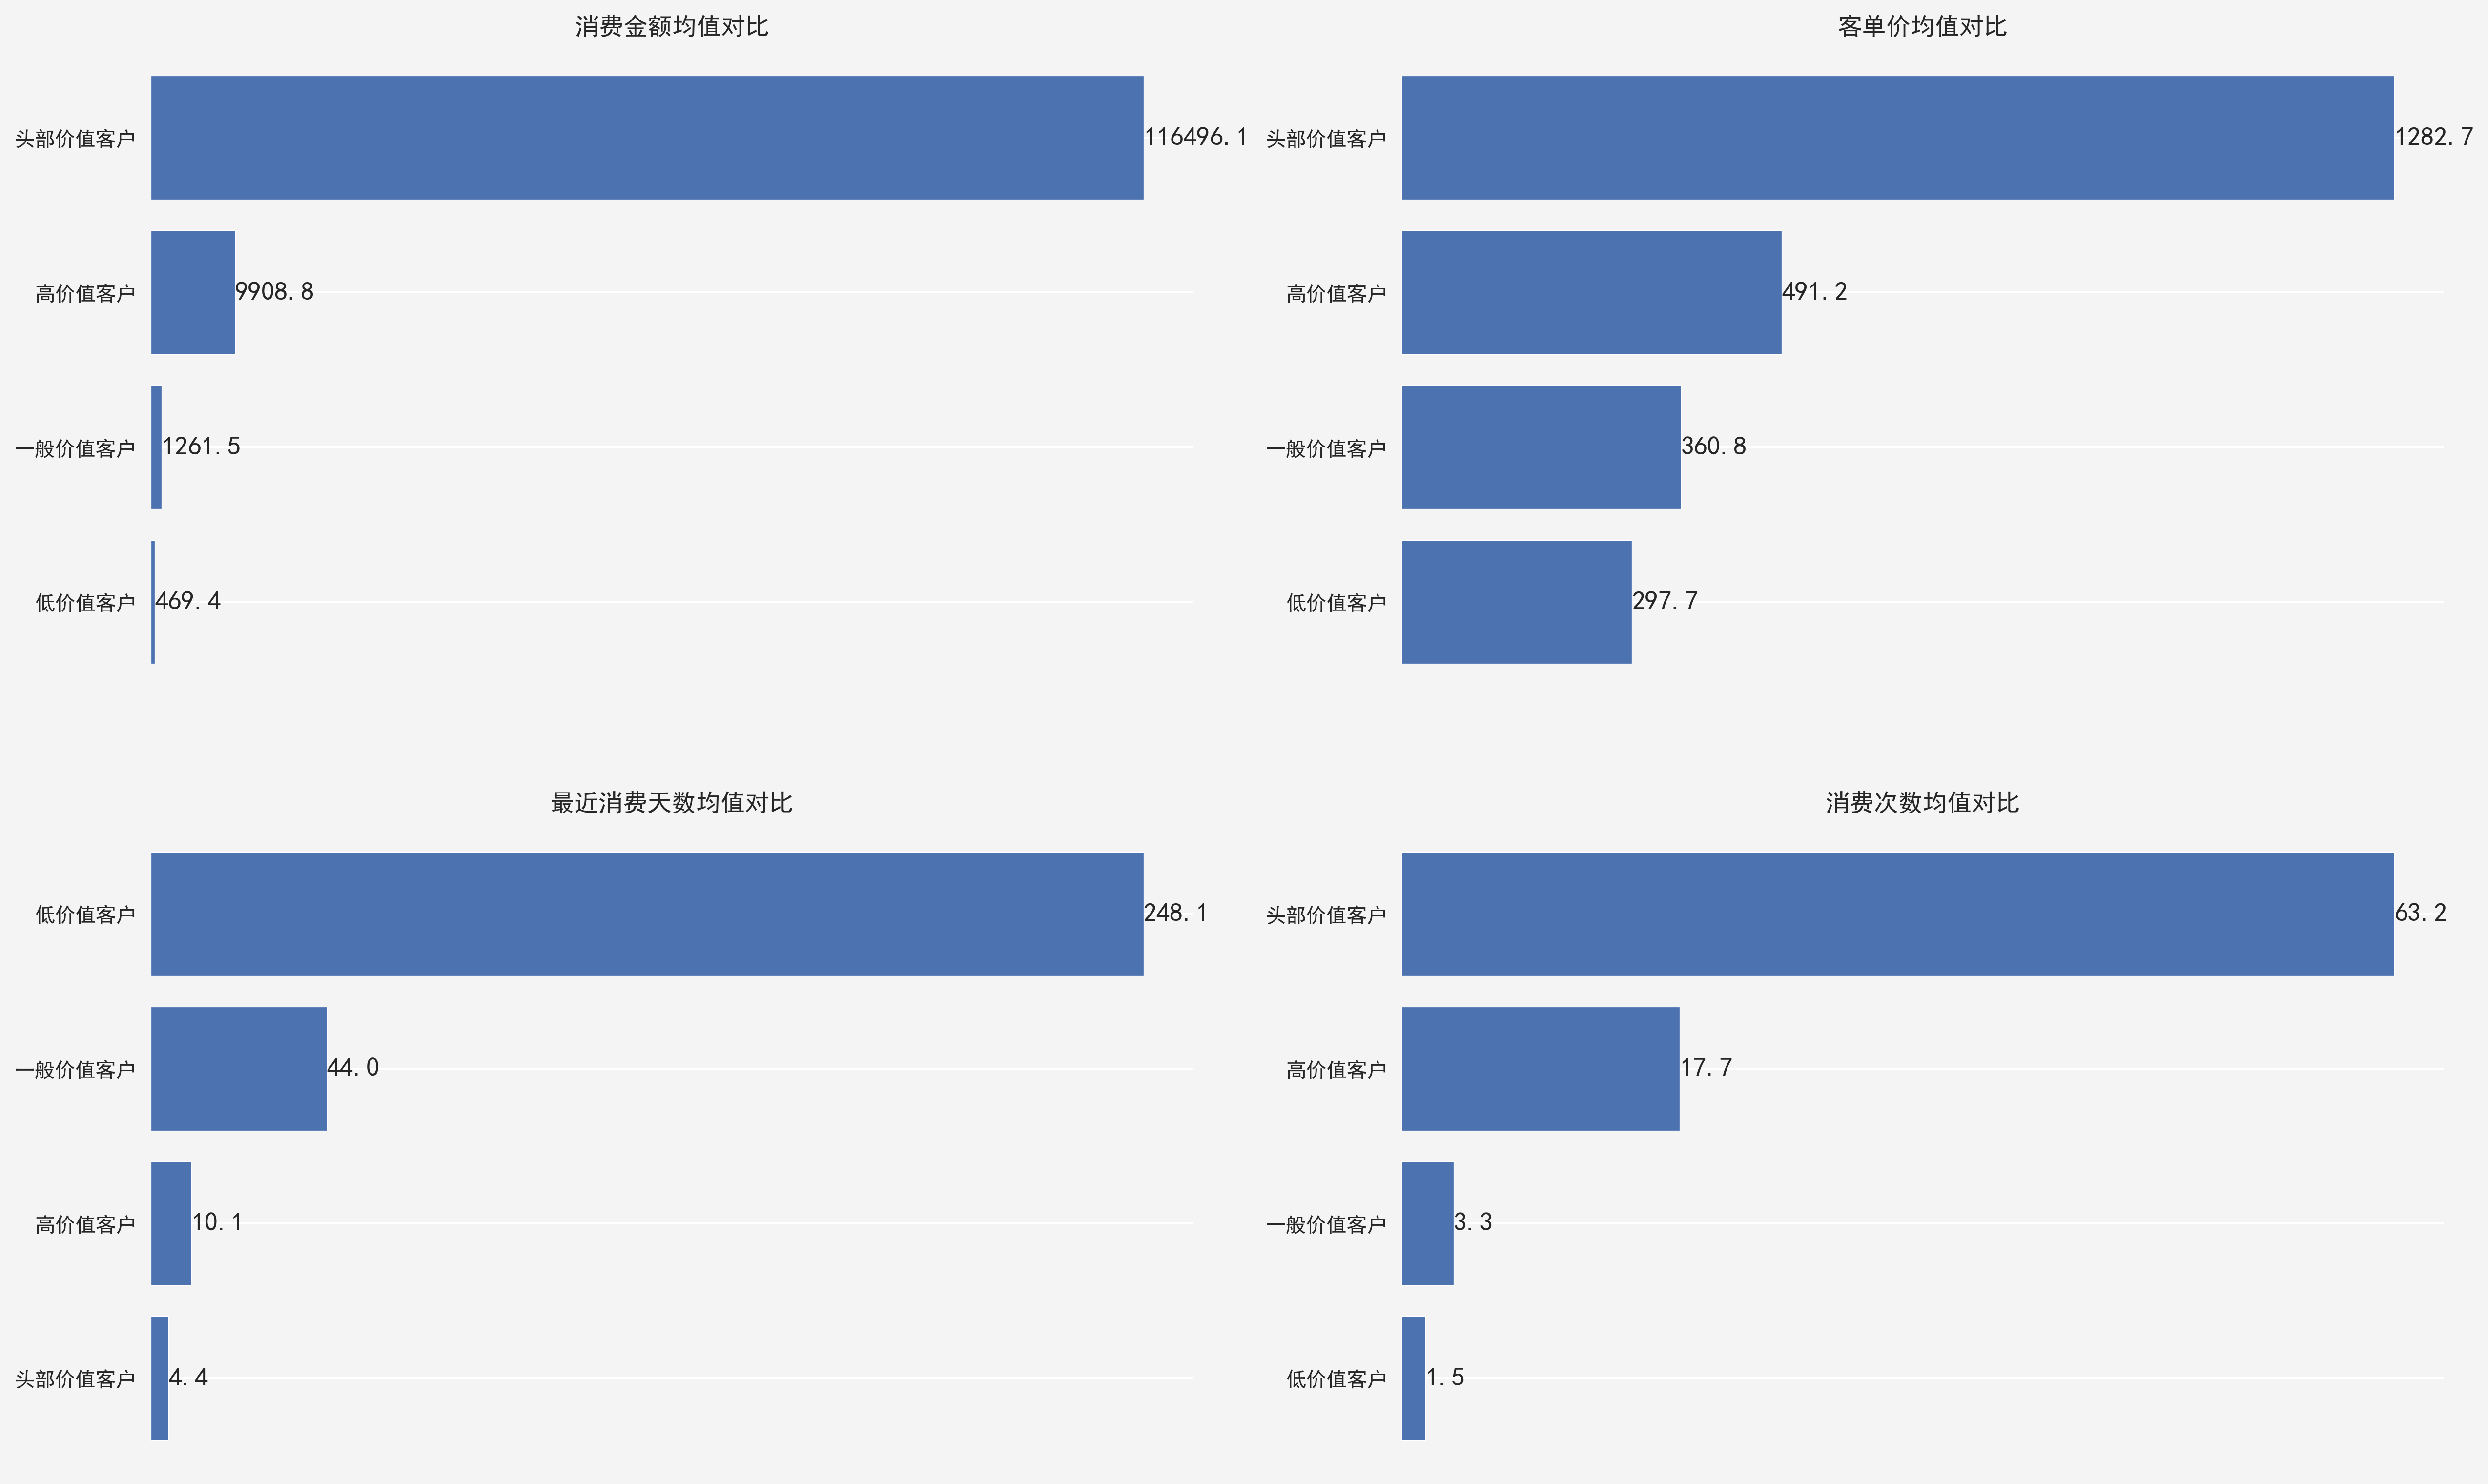

In [99]:
import matplotlib.pyplot as plt

def customer_level_barh(data_level,name):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12), facecolor='#f4f4f4', dpi=300)
    plt.style.use('seaborn-v0_8-darkgrid')  # 使用合法的样式名称

    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    columns_list = [['消费金额', '客单价'], ['最近消费天数', '消费次数']]
    for i in [0,1]:
        for j in [0,1]:
            index = data_level[columns_list[i][j], '均值'].sort_values().index
            values = data_level[columns_list[i][j], '均值'].sort_values().values
            ax[i][j].barh(index, values)

            for k in range(len(data_level)):
                ax[i][j].text(values[k], k, f'{values[k]:.1f}', ha='left', va='center', size=13)  

            ax[i][j].set_title(columns_list[i][j]+'均值对比')
            ax[i][j].set_facecolor('#f4f4f4')
            ax[i][j].set_xticks([])  

            for m in ['left', 'right', 'top', 'bottom']:
                ax[i][j].spines[m].set_color("#f4f4f4")  

            ax[i][j].tick_params(axis='y', which='major', color='#f4f4f4')  
    plt.savefig("{}指标对比条形图.png".format(name), dpi=300, bbox_inches='tight', pad_inches=0.5)
    plt.show()

customer_level_barh(kmeans_level,'K-Means')


In [101]:
k_data

,R,F,M,label
CustomerID,,,,
12347,2.0001,7,4310.00,1
12348,75.0001,4,1797.24,1
12349,18.0001,1,1457.55,1
12350,310.0001,1,334.40,0
12352,36.0001,7,1665.74,1
...,...,...,...,...
18280,277.0001,1,180.60,0
18281,180.0001,1,80.82,0
18282,7.0001,2,178.05,1


In [95]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']